<a href="https://colab.research.google.com/github/mokymok/notebooks/blob/main/stats1_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Lambda School Data Science - Intro to Statistics 
---
# Lecture 09 - Descriptive Statistics I
---



## How to think about descriptive statistics

As the name suggests, descriptive statistics refers to the ways in which you can describe the data you're working with. Data can have many varied characteristics, all of which can tell you something about that data. Let's begin with *measures of central tendency*.  


## What is central tendency?

Let's say you're part of a group of 30 data science students at Lambda. Chances are, if asked, you'd be able to compute the average age of that group. The thing is, not all averages are the same. And what's the point of an average, anyway?


First of all, you can think of an *average* as a single value that best represents a group of values.

Now, *averages* (the plural) can be considered interchangeable with *central tendency*. In other words, central tendency = the value(s) that best represents a group of values.

**There are three main measures of central tendency:**
1.   Mean 
2.   Median
3.   Mode





In [ ]:
# Let's begin by importing our tools:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Mean

**The *mean* of a group of values is derived by adding all of the values together, and then dividing them by the number of values there are. When most people hear the word "average," this is what they think of.** 






In [ ]:
# Let's create a group of values using a normal Python list:
numbers = [12, 12, 13, 11, 24, 55, 23, 87, 65, 40, 1000]

def mean(nums):
  return sum(nums) / len(nums)

mean(numbers)

122.0

In [ ]:
# Numpy has a built-in function for finding the mean:

np.mean(numbers)

122.0

Numpy [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) on mean function.

## Median

**The *median* of a group of values is derived by ordering all of the values, then finding their midpoint. In other words, the value that is equidistant from the largest and the smallest value in the set of values.** 






In [ ]:
numbers = [12, 12, 13, 13, 11, 24, 55, 23, 87, 65, 40, 1000]
sorted(numbers)

[11, 12, 12, 13, 13, 23, 24, 40, 55, 65, 87, 1000]

In [ ]:
def median(nums):
  n = len(nums)
  if n < 1:
    return None
  if n % 2 == 1:
    return sorted(nums)[n//2]
  else:
    return sum(sorted(nums)[n//2-1:n//2+1])/2.0
  
median(numbers)

24

In [ ]:
np.median(numbers)

23.5

### A note about median vs. mean:

The mean is more susceptible than the median to being pulled in the direction of "outliers." For now, just think about outliers as values that are either really big or really small relative to the mean.

## Mode

**The *mode* of a set of values is the value which occurs with the highest frequency. In other words, the most common value.** 






In [ ]:
# Numpy has no built-in function for mode, but the Python ecosystem does have a dedicated statistics library:

import statistics as stats
stats.mode(numbers)

StatisticsError: ignored

Statistics library [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Different types of variables in statistics

Obviously, not all data are the same. For some, their order matters. Others represent categories instead of numbers. Again, this is paralleled in how Python represents different variables with different data types. If you recall the module on Python variables, not all variables are equal in their representation of values. Let's quickly cover the basic types of variables in statistics:



*   **Ordinal**: can be ordered/ranked (historical financial data, time series data, etc.)
*   **Categorical (or Discrete)**: categories like gender, political affiliation, or binaries (voted/didn't vote)
*   **Numeric**: numbers, either discrete or continuous



**Let's put this all together with a familiar dataset:**

In [ ]:
# Simply run this cell to import the tips dataset:

df = pd.read_csv("https://raw.githubusercontent.com/axrd/datasets/master/tipdata.csv", index_col=0)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*   **total_bill** is continuous, ordinal, and numeric
*   **tip** is also continuous, ordinal, and numeric
*   **sex** is categorical or discrete; it's also binary (male vs. female)
*   **smoker** same as *sex*
*   **day** is categorical but not binary (there are 7 categories, 1 for each day of the week)
*   **time** is categorical (discrete)
*   **size** is numeric and categorical/discrete (can't have 3.4 people at a table)



## Distributions!

At the end of the Intro to Pandas lesson, we introduced visualizations because a *picture is worth a thousand words.* Let's do the same here so we can see what's going on more easily.



In [ ]:
# Let's make a list of 250 random numbers between 1 and 1000 and assign
# it to a variable "a":

import random
a = random.sample(range(1, 1000), 250)
a

[939,
 252,
 302,
 250,
 542,
 377,
 399,
 92,
 85,
 448,
 415,
 655,
 784,
 531,
 221,
 199,
 359,
 391,
 644,
 142,
 309,
 182,
 861,
 257,
 10,
 580,
 178,
 951,
 498,
 734,
 272,
 368,
 471,
 613,
 491,
 296,
 930,
 870,
 328,
 584,
 435,
 230,
 457,
 988,
 526,
 819,
 535,
 593,
 884,
 679,
 486,
 658,
 671,
 283,
 248,
 543,
 698,
 642,
 661,
 41,
 518,
 506,
 389,
 791,
 673,
 27,
 422,
 445,
 478,
 167,
 42,
 846,
 111,
 53,
 601,
 23,
 774,
 340,
 185,
 334,
 48,
 980,
 479,
 825,
 691,
 118,
 594,
 640,
 326,
 100,
 434,
 146,
 840,
 211,
 895,
 62,
 181,
 916,
 586,
 352,
 157,
 424,
 559,
 911,
 609,
 878,
 156,
 813,
 943,
 11,
 770,
 994,
 339,
 89,
 897,
 877,
 999,
 568,
 667,
 551,
 78,
 432,
 216,
 35,
 901,
 93,
 795,
 79,
 739,
 251,
 539,
 341,
 807,
 598,
 217,
 711,
 159,
 925,
 519,
 321,
 596,
 204,
 253,
 140,
 280,
 190,
 314,
 81,
 406,
 960,
 864,
 194,
 941,
 630,
 766,
 86,
 818,
 323,
 24,
 390,
 964,
 507,
 599,
 908,
 242,
 576,
 174,
 67,
 722,
 775,


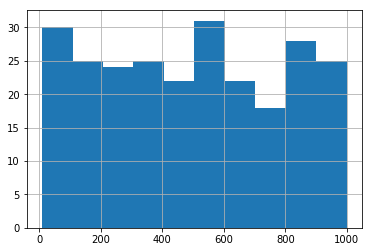

In [ ]:
# Let's turn it into a pandas DataFrame and plot it to visualize the distribution 
# of numbers:
data = pd.DataFrame({'random_nums': a}) 

data['random_nums'].hist();

In [ ]:
np.mean(data['random_nums'])

495.544

In [ ]:
np.median(data['random_nums'])

494.5

If you run the cell with the random number generator, it will create a new random list. Run the plotting cell again to visualize the new list of random numbers. Check out the different distributions of values! What can you say about their central tendency?

### Skewness: left, right, or middle?

![Skewness](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

## Variability: how spread out is our data?

**Also known as the *spread* of a set of values, variability measures how different they are from each other. More intuitively, variability is a measure of how far values are from one specific value. Can you guess which one? Hint, how can you describe a group of values with just one value?**



*   **Range**: the difference between the largest and smallest values in a set.
*   **Variance**: the difference between the largest and smallest values in a set.
*   **Standard deviation**: the average distance from the mean.



In [ ]:
# Let's get sales performance data from the sales dataset we've used previously:

sales = pd.read_csv("https://raw.githubusercontent.com/axrd/datasets/master/sales_data.csv", index_col=0)
sales.head()

,Name,Region,Company,Date,Sales
0,Brenden Cote,Central African Republic,Metus Corp.,"Feb 17, 2018",67044
1,Justina Reed,Namibia,Lobortis Ltd,"Apr 27, 2017",89517
2,Daquan Vinson,Svalbard and Jan Mayen Islands,A Mi Consulting,"Aug 14, 2016",62705
3,Connor Shelton,Niue,Parturient Consulting,"Feb 13, 2017",12675
4,Drew Carlson,Mayotte,Interdum Associates,"Sep 26, 2017",86670


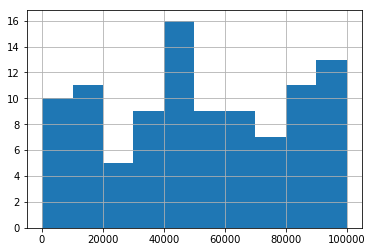

In [ ]:
sales['Sales'].hist(bins=10);

In [ ]:
np.mean(sales['Sales'])

51892.47

In [ ]:
# Let's calculate the variance:
# Variance is the average squared distance of each point from the mean
np.var(sales['Sales'], ddof=1)

882506150.9788889

In [ ]:
# Lets calculate the standard deviation:
# Standard Deviation is the average distance of each point from the mean
np.std(sales['Sales'], ddof=1)

29707.00508262132

In [ ]:
# The Standard Deviation is the Square Root of the variance. 
np.sqrt(np.var(sales['Sales'], ddof=1))

29707.00508262132

In [ ]:
# Here's a really useful built-in pandas method to get some summary descriptive
# statistics:

sales.describe()

,Sales
count,100.000000
mean,51892.470000
std,29707.005083
min,59.000000
25%,29415.750000
50%,48845.500000
75%,77878.000000
max,99880.000000


### Time for your assignment!



Also, [this will probably come in handy](http://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf). Be careful not to just copy and paste things if you're asked a written question. Demonstrate your own thinking. 